In [2]:
import numpy as np
import pandas as pd


from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# I created this DataFrame containing the features and target variables.
cancer_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_data["target"] = cancer.target


cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
print("dataset dimension", cancer_data.shape)

dataset dimension (569, 31)


<Axes: >

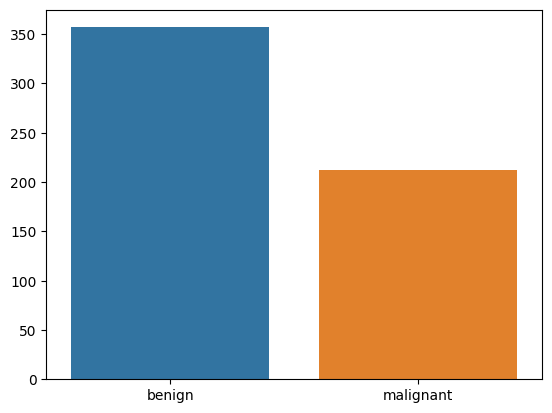

In [6]:
# This section shows the distribution of the class.

# I created a DataFrame of the target variable.
target_series = cancer_data.target.value_counts()
target_data = pd.DataFrame([target_series])
target_data.columns = ["benign", "malignant"]


# I imported seaborn to visualize the distribution.
import seaborn as sns


sns.barplot(target_data)

In [7]:
# I split the DataFrame into two parts: one called 'X,' which contains
# the features, and the other called 'y,' which contains the target labels.

X = cancer_data.copy()
y = X.pop("target")

In [8]:
print("X dimension", X.shape, "\ny dimension", y.shape)

X dimension (569, 30) 
y dimension (569,)


In [9]:
# Here I split X and y into two sets: training and testing.

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)



# This code just shows the dimensions of the split made.
shapes = {"X": [X_train.shape, X_test.shape],
          "y": [y_train.shape, y_test.shape]}

pd.DataFrame(shapes, index=["Train", "Test"])

,X,y
Train,"(426, 30)","(426,)"
Test,"(143, 30)","(143,)"


In [10]:
# Here I trained a KNN classifier using the training set datasets

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
# I predicted the class labels using the test set.

y_test_predictions = model.predict(X_test)

In [12]:
# I wanted to know how good these predictions are.

score = model.score(X_test, y_test)

score

0.9370629370629371